In [17]:
import math
import matplotlib.pyplot as plt

In [26]:
N = 1
J = 2
M = 1
t = [0.3]
x_1_lvl = [1, 2]
n = 1

In [19]:
def activation_func(net):
    res = (1 - math.e ** (-net)) / (1 + math.e ** (-net))
    return res

In [20]:
def derivative(net):
    res = 0.5 * (1 - activation_func(net) ** 2)
    return res

In [21]:
def err(y_arr):
    return math.sqrt(sum([(t_j - y_j) ** 2 for t_j, y_j in zip(t, y_arr)]))

In [22]:
def epoch(w_arr_1, w_arr_2):
    net_1_lvl = []
    x_2_lvl = [1]
    for j in range(J):
        net = sum([w[j] * x_i for w, x_i in zip(w_arr_1[1:], x_1_lvl)]) + w_arr_1[0][j]
        net_1_lvl.append(net)
        x_2_lvl.append(activation_func(net))
        
    net_2_lvl = []
    y_arr = []
    b_2_lvl = []    
    for m in range(M):
        net = sum([w[m] * x_j for w, x_j in zip(w_arr_2[1:], x_2_lvl)]) + w_arr_2[0][m]
        net_2_lvl.append(net)
        y = activation_func(net)
        y_arr.append(y)
        b = derivative(net) * (t[m] - y)
        b_2_lvl.append(b)
        
    b_1_lvl = []    
    for j in range(J):
        s = 0
        for m in range(M):
            s += w_arr_2[j][m] * b_2_lvl[m]
        b = derivative(net_1_lvl[j]) * s
        b_1_lvl.append(b)

    for i in range(N + 1):
        for j in range(J):
            delta_w = n * x_1_lvl[i] * b_1_lvl[j]
            w_arr_1[i][j] = w_arr_1[i][j] + delta_w

    for j in range(J + 1):
        for m in range(M):
            delta_w = n * x_2_lvl[j] * b_2_lvl[m]
            w_arr_2[j][m] = w_arr_2[j][m] + delta_w

    e = err(y_arr)
    return w_arr_1, w_arr_2, y_arr, e

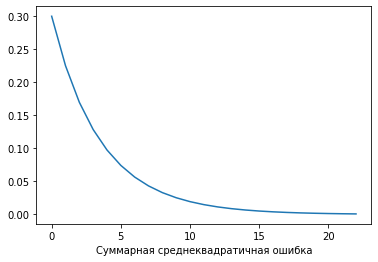

In [37]:
w_arr_1 = [[0 for x in range(J)] for y in range(N + 1)]
w_arr_2 = [[0 for x in range(M)] for y in range(J + 1)]
err_array = []
i = 0
e = 1 
while e > 0.001:
#     print("=====================================================================")
    w_arr_1, w_arr_2, y_arr, e = epoch(w_arr_1, w_arr_2)
#     print("W1: ", [[round(j, 7) for j in i] for i in w_arr_1])
#     print("W2: ", w_arr_2)
#     print("Y: ", y_arr)
#     print("Error:", "%.7f" % e)
#     print("Epoch:", i)
    err_array.append(round(e, 5))
    i += 1
plt.plot([float("%.5f" % x) for x in err_array])
plt.xlabel("Суммарная среднеквадратичная ошибка")
plt.show()